# 聚类
## K均值聚类

### 数学原理
> 参考：《Python数学实验与建模》
>
> [聚类算法优缺点对比](https://blog.csdn.net/weixin_46713695/article/details/125725036?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522168880886016782425175195%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&amp;request_id=168880886016782425175195&amp;biz_id=0&amp;utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduend~default-1-125725036-null-null.142^v88^insert_down1,239^v2^insert_chatgpt&amp;utm_term=%E4%B8%8D%E5%90%8C%E8%81%9A%E7%B1%BB%E7%AE%97%E6%B3%95%E7%9A%84%E4%BC%98%E7%BC%BA%E7%82%B9&amp;spm=1018.2226.3001.4187)
>
> [Chapter 14: Clustering.pdf: 6.036 Introduction to Machine Learning (mit.edu)](https://canvas.mit.edu/courses/7509/files/1044932)

假定样本集中的全体样本可以分为$C$类，并选定$C$个初始聚类中心，然后根据最小距离原则将每个样本分配到某一类中，之后不断迭代计算各类的聚类中心，并依据新的聚类中心调整聚类情况，直到迭代收敛或聚类中心不再改变。

K-均值聚类算法最后将总样本集$G$划分成$C$个子集：$G_1,G_2,...,G_C$，他们满足下面条件：

1. $G_1 \cup G_2 \cup...\cup G_C=G;$
2. $G_i \cup G_j = \varnothing (1 \leq i \lt j \leq C)$
3. $G_i \neq \varnothing, G_i \neq G (1 \leq i \leq C)$

设$m_i (i=1,...,C)$为$C$个聚类中心，记

$$
J_e = \sum_{i=1}^{C} \sum_{\omega\in G_i} \lVert \omega - m_i \rVert^2
$$

使$J_e$最小的聚类是误差平方和准则下的最优结果

### 优点
1. 简单，易于理解和实现
2. 时间复杂度低
3. 当簇是密集的、球状或团状的，而簇与簇之间区别明显时，它的聚类效果很好

### 缺点
1. 需要对均值给出定义
2. 需要指定要聚类的数目，对 K 值敏感。也就是说，K 的选择会较大程度上影响分类效果
3. 对离群点和噪声点敏感，一些过大的异常值会带来很大影响
4. 算法对初始聚类中心选择敏感

In [2]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

In [5]:
X
# X是造出来的数据集，有1000个样本，2个特征，2个有效特征，0个冗余特征，每个类别簇数量是1个，随机数生成器种子值为4
# X, _的语法忽略了特征，我们也可以加上

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       ...,
       [ 1.54270795, -0.05566478],
       [ 0.81664566, -1.2509187 ],
       [ 1.13782254, -1.26151957]])

In [9]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
y[:10]
# 前十个样本的数据标签

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [11]:
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
yhat[:40]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0])

In [12]:
yhat.size

1000

In [15]:
# retrieve unique clusters
# 这一步将预测出来的标签做unique处理，这样就只有两种类型了
clusters = unique(yhat)
clusters.size

2

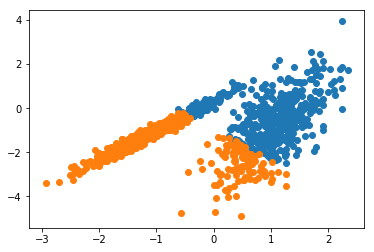

In [19]:
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
    #这里yhat == cluster会生成一个布尔数组
    #然后where是寻找这个布尔数组中为True的下标，即找到属于这个cluster的下标
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

### 尝试选取不同的n值
我们依次选取n=2,3,4,5,6,7，然后绘制在子图中

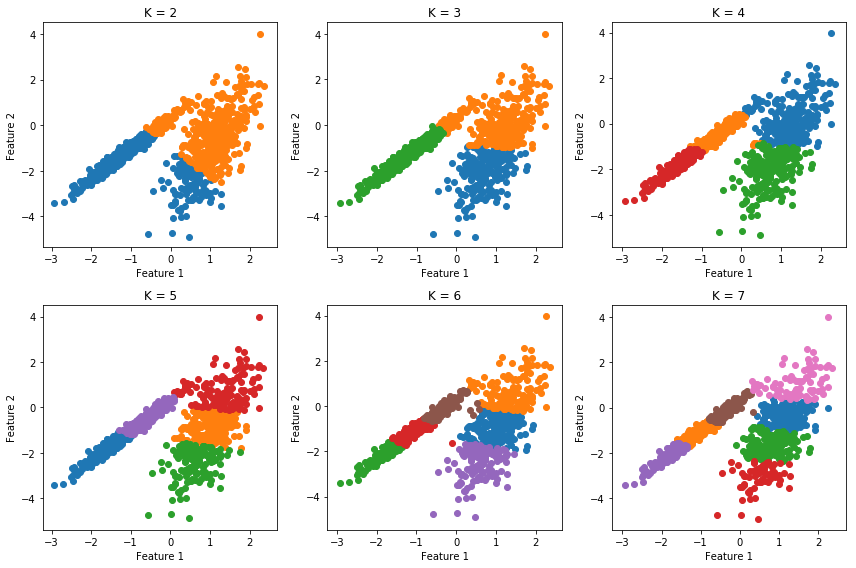

In [28]:
from numpy import unique, where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

num_clusters=range(2,8)

# 创造2x3的子图
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# 遍历不同的组数
# 这里enumerate的作用是，遍历num_clusters列表，将值存在n中，将下标存在i中
for i, n in enumerate(num_clusters):
    # create KMeans model
    model = KMeans(n_clusters=n)
    
    # fit the model
    model.fit(X)
    
    # assign a cluster to each example
    yhat = model.predict(X)

    # retrieve unique clusters
    clusters = unique(yhat)
    
    # plot the clusters in the corresponding subplot
    row = i // 3    #python中的整除运算符
    col = i % 3
    ax = axs[row, col]
    
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        ax.scatter(X[row_ix, 0], X[row_ix, 1])
        ax.set_title(f"K = {n}")
        # 字符串的格式化语法，f前缀之后的字符串中，被{}包含的部分代表变量
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")

# 自动调整子图之间的间距
plt.tight_layout()

# show the plot
plt.show()

## 如何选取最佳K值

我们有4种方法：
1. 肘部法则（Elbow Method）
2. 轮廓系数（Silhouette Coefficient）
3. 间隔统计量（Gap Statistic）
4. 领域知识和先验信息

下面给出前两种的实现代码

### 肘部法则
通过绘制不同K值下的聚类损失（例如，平方误差和）与K值的关系图，观察图像中的"肘部"点。该肘部点是聚类损失下降速率变缓的点，通常表示了最佳的K值。

在K均值聚类中，每个样本点都被分配到距离其最近的聚类中心，以形成簇。聚类损失函数（也称为簇内平方和）是衡量聚类效果的指标，它计算了每个样本点与其所属聚类中心之间的距离的平方，并对所有样本进行求和。

当簇数K增加时，每个簇的样本数量会减少，从而聚类损失也会减少。然而，如果K值设置得太大，可能会出现过度拟合的情况，导致簇内距离减小的幅度不再显著，而簇间距离的改善效果相对较小。

肘部法则的核心思想是观察聚类损失随着簇数的增加而变化的模式。当K值较小时，聚类损失通常会较大幅度地下降。然而，随着K值的继续增加，聚类损失的改善效果逐渐减小。在某个K值之后，聚类损失的改善趋势会形成一个肘部形状，即曲线开始变得平缓。

根据肘部法则，我们选择使聚类损失显著下降的那个K值作为最佳的簇数。这个K值通常对应于肘部形状的转折点，因为在转折点之后，增加更多的簇并不会显著改善聚类结果。

**下面的例子中可以看到，在k=3的时候簇内损失会放缓，所以最好选取3作为k的值**

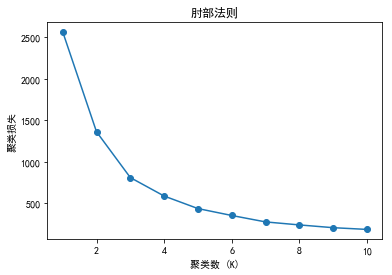

In [40]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.metrics import pairwise_distances_argmin_min
import matplotlib.pyplot as plt

# 生成分类数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# 计算不同K值下的聚类损失
k_values = range(1, 11)
losses = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(X)
    loss = model.inertia_
    losses.append(loss)

# 绘制肘部法则图
plt.plot(k_values, losses, marker='o')
plt.xlabel('聚类数 (K)')
plt.ylabel('聚类损失')
plt.title('肘部法则')
plt.show()

### 轮廓系数
根据绘制的图像，选择具有最大平均轮廓系数的K值作为最佳K值。

这里的轮廓系数当k=3的时候最大，和上面的差不多

轮廓系数的详解：
https://www.wikiwand.com/zh/%E8%BD%AE%E5%BB%93_(%E8%81%9A%E7%B1%BB)

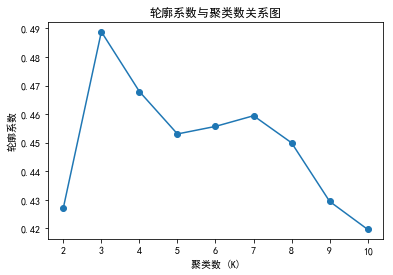

In [39]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score

# 生成分类数据集
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# 计算不同K值下的轮廓系数
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

    
#后面要在plt中绘制中文，因此这里先设置一下中文字体
plt.rcParams['font.family'] = 'SimHei'  # 设置中文字体为黑体或其他合适的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题
#其他中文字体
# 'Microsoft YaHei'：微软雅黑字体
# 'SimSun'：宋体字体
# 'SimKai'：楷体字体
# 'FangSong'：仿宋字体
# 'KaiTi'：楷体字体
# 'LiSu'：隶书字体
# 'YouYuan'：幼圆字体
# 'STSong'：华文宋体
# 'STKaiti'：华文楷体
# 'STFangsong'：华文仿宋
# 'STXihei'：华文细黑
# 'STLiti'：华文隶书


# 绘制轮廓系数图
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('聚类数 (K)')
plt.ylabel('轮廓系数')
plt.title('轮廓系数与聚类数关系图')
plt.show()

## K-Means的另一个例子

来源：https://www.kaggle.com/code/prashant111/k-means-clustering-with-python

### 导入数据集
数据可以从来源处的input进行下载，这里我放在了同一级的datasets文件夹中

In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [56]:
import os
for dirname, _, filenames in os.walk('.\datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# 任何在这个工程文件夹的datasets子文件夹中的文件将被输出

.\datasets\Live.csv


In [59]:
#忽略警告
import warnings
warnings.filterwarnings('ignore')

#导入数据集
data = '.\datasets\Live.csv'
df = pd.read_csv(data)

df[:10]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,NaN,NaN,NaN,NaN
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,NaN,NaN,NaN,NaN
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,NaN,NaN,NaN,NaN
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,NaN,NaN,NaN,NaN
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,NaN,NaN,NaN,NaN
